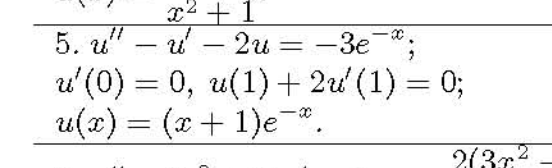

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [ ]:
a = 0
b = 1

p_x = lambda x: sp.exp(-x)
q_x = lambda x: -2 * p_x(x)
f_x = lambda x: -3 * sp.exp(-x) * p_x(x)

u_exact = lambda x: (x + 1) * np.exp(-x)

begin = u_exact(a)
end = u_exact(b)

phi_0 = lambda x: begin + (end - begin) * x
dphi_0 = lambda x: end - begin

phi_k = lambda x, k: x * k * (1 - x) ** (2 * k)
dphi_k = lambda x, k: k * (1 - x) ** (2 * k) - 2 * k**2 * x * (1 - x) ** (2 * k - 1)

N = 2

In [7]:
u_x = lambda x, C_s: phi_0(x) + sum(
    [C_s[k - 1] * phi_k(x, k) for k in range(1, N + 1)]
)

x = sp.Symbol("x", real=True)
C_s = sp.symbols(f"c:{N}")

F_int_i = lambda i: (
    2
    * p_x(x)
    * (dphi_0(x) + sum([C_s[j] * dphi_k(x, j + 1) for j in range(N)]))
    * dphi_k(x, i + 1)
    - 2
    * q_x(x)
    * (phi_0(x) + sum([C_s[j] * phi_k(x, j + 1) for j in range(N)]))
    * phi_k(x, i + 1)
    + 2 * f_x(x) * phi_k(x, i + 1)
)


F_ints = [sp.integrate(F_int_i(i), (x, a, b)).expand() for i in range(N)]

A = np.zeros((N, N))
B = np.zeros(N)


for i in range(N):
    for j in range(N):
        A[i, j] = F_ints[i].coeff(C_s[j])

    B[i] = -1 * F_ints[i].subs({C_s[j]: 0 for j in range(N)})

C_s_sol = np.linalg.solve(A, B)
u_x_sol = u_x(x, C_s_sol)

xs = np.linspace(a, b, 1000)

u_exact = u_exact(xs)
u_sol = np.array([u_x_sol.subs(x, i) for i in xs], dtype=float)


----- Ошибки -----
Максимальная ошибка: 0.0032423394810381367
Средняя ошибка: 0.0017057137241173847


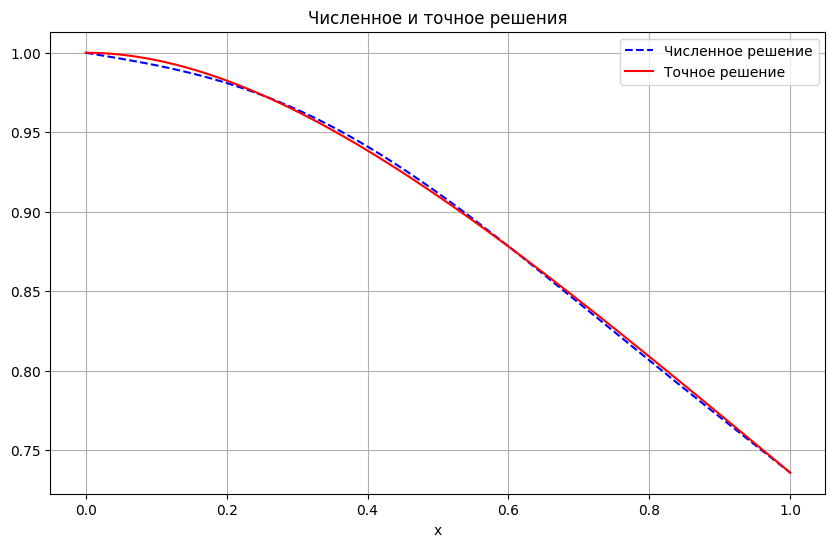

In [8]:
max_error = np.max(np.abs(u_exact - u_sol))
mean_error = np.mean(np.abs(u_exact - u_sol))

print()
print("----- Ошибки -----")
print(f"Максимальная ошибка: {max_error}")
print(f"Средняя ошибка: {mean_error}")

plt.figure(figsize=(10, 6))
plt.plot(
    xs,
    u_sol,
    "b",
    label="Численное решение",
    linestyle="--",
)

plt.plot(
    xs,
    u_exact,
    "r",
    label="Точное решение",
)

plt.xlabel("x")
plt.legend()
plt.title("Численное и точное решения")
plt.grid()
plt.show()